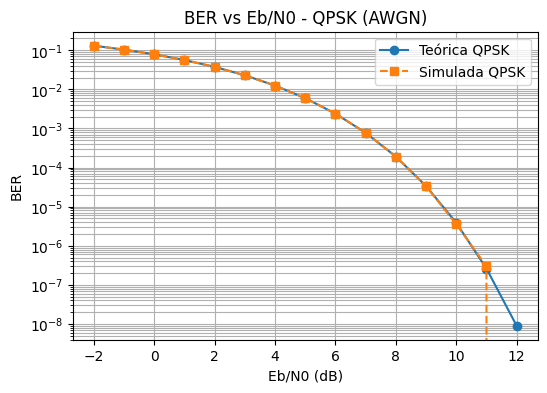

In [4]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Rb = 400
bits_por_simbolo = 2
EbN0_dB = np.arange(-2, 13, 1)
num_bits_por_ponto = 10000000

rng = np.random.default_rng(42)

def qfunc(x):
    return 0.5 * math.erfc(x / math.sqrt(2))

def qfunc_vec(x):
    x = np.atleast_1d(x)
    return 0.5 * np.array([math.erfc(float(xi) / math.sqrt(2)) for xi in x])

EbN0_linear = 10 ** (EbN0_dB / 10)
ber_teorica = qfunc_vec(np.sqrt(2 * EbN0_linear))

ber_sim = []
for ebn0_lin in EbN0_linear:
    nbits = num_bits_por_ponto
    b = rng.integers(0, 2, size=(nbits,))
    b2 = rng.integers(0, 2, size=(nbits,))
    
    I = (2*b - 1) / np.sqrt(2)
    Q = (2*b2 - 1) / np.sqrt(2)
    
    sigma2 = 1.0 / (4.0 * ebn0_lin)
    ruido_I = rng.normal(0.0, np.sqrt(sigma2), size=nbits)
    ruido_Q = rng.normal(0.0, np.sqrt(sigma2), size=nbits)
    
    rI = I + ruido_I
    rQ = Q + ruido_Q
    
    b_dec = (rI >= 0).astype(int)
    b2_dec = (rQ >= 0).astype(int)
    
    erros = np.count_nonzero(b_dec != b) + np.count_nonzero(b2_dec != b2)
    ber = erros / (2*nbits)
    ber_sim.append(ber)

ber_sim = np.array(ber_sim)
df = pd.DataFrame({"EbN0_dB": EbN0_dB, "BER_simulada": ber_sim, "BER_teorica": ber_teorica})
df.to_csv("ber_qpsk_resultados.csv", index=False)

plt.figure(figsize=(6,4))
plt.semilogy(EbN0_dB, ber_teorica, marker='o', linestyle='-', label='Teórica QPSK')
plt.semilogy(EbN0_dB, ber_sim, marker='s', linestyle='--', label='Simulada QPSK')
plt.grid(True, which='both')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER')
plt.title('BER vs Eb/N0 - QPSK (AWGN)')
plt.legend()
plt.savefig("ber_qpsk.png", dpi=160, bbox_inches='tight')
plt.show()